# Geodesic Path in Curved Spacetime — Example Notebook

## 1) Concept

A **geodesic** is the path that a free particle (or light ray) follows through spacetime — the “straightest possible” line in curved spacetime.

In General Relativity, the geodesic equation is:

$$
\frac{d^2 x^\mu}{d\lambda^2} + \Gamma^\mu_{\nu\rho} \frac{dx^\nu}{d\lambda} \frac{dx^\rho}{d\lambda} = 0
$$

where:

- $x^\mu$ are the coordinates (e.g., $t, r, \theta, \phi$)
- $\lambda$ is the affine parameter (proper time for massive particles)
- $\Gamma^\mu_{\nu\rho}$ are the Christoffel symbols

---

## 2) Example Metric

**Example:** The 2D surface of a sphere is a simple curved space.  
In spherical coordinates, the metric is:

$$
ds^2 = d\theta^2 + \sin^2\theta\, d\phi^2
$$

A geodesic on this surface is a **great circle** — like airplane routes over the globe.

---

## 3) Geodesic Equations for the Sphere

We want to solve the geodesic equations for the sphere (**NOTE: See below on how to arrive at this equations**):

$$
\frac{d^2 \theta}{d\lambda^2} - \sin\theta \cos\theta \left( \frac{d\phi}{d\lambda} \right)^2 = 0
$$

$$
\frac{d^2 \phi}{d\lambda^2} + 2 \cot\theta \frac{d\theta}{d\lambda} \frac{d\phi}{d\lambda} = 0
$$

These come from plugging the sphere’s metric into the general geodesic equation.

---

In Python, we’ll solve these using `scipy.integrate.solve_ivp` to find a geodesic path.


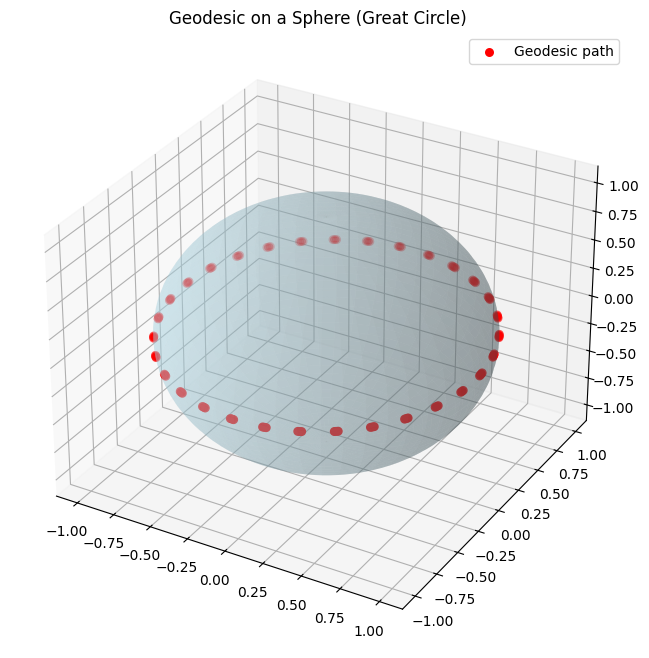

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Geodesic equations for a sphere
def geodesic_equations(lam, y):
    theta, phi, dtheta_dlam, dphi_dlam = y # y is a 4-tuple vector. y is just a variable that holds these 4 values when this function is called
    
    d2theta_dlam2 = np.sin(theta) * np.cos(theta) * dphi_dlam**2
    d2phi_dlam2 = -2 * (1/np.tan(theta)) * dtheta_dlam * dphi_dlam
    
    return [dtheta_dlam,
            dphi_dlam,
            d2theta_dlam2,
            d2phi_dlam2]

# For example, start at theta = pi/2, phi = 0
# Initial direction: move north with initial dtheta/dlam = 0.1, no change in phi initially

theta0 = np.pi / 2
phi0 = 0.0
dtheta0 = -0.1 # initial "kick" in theta direction
dphi0 = 1.0    # initial "kick" in phi direction. Try different values to see different geodesics!

y0 = [theta0, phi0, dtheta0, dphi0]

# Integrate over affine parameter: Integrate from lambda = 0 to lambda = 20
lam_span = (0, 20)
sol = solve_ivp(fun=geodesic_equations, t_span=lam_span, y0=y0, t_eval=np.linspace(0, 20, 100))

theta = sol.y[0]
phi = sol.y[1]

# Convert to Cartesian for 3D plot
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Plot the sphere and the geodesic
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Sphere surface for context
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
xs = np.sin(v) * np.cos(u)
ys = np.sin(v) * np.sin(u)
zs = np.cos(v)
ax.plot_surface(xs, ys, zs, color='lightblue', alpha=0.3)

# Plot the geodesic path
ax.scatter(x, y, z, color='red', lw=2, label='Geodesic path')
# ax.plot(x, y, z, color='red', lw=2, label='Geodesic path') # OR do this

ax.set_title('Geodesic on a Sphere (Great Circle)')
ax.legend()
plt.show()


# From Metric to Geodesic Equations on a Sphere

## 1) Start with the Metric

For the **2D sphere**, the line element is:

$$
ds^2 = d\theta^2 + \sin^2\theta\, d\phi^2.
$$

This defines the **metric tensor** $g_{\mu\nu}$:

$$
g_{\theta\theta} = 1, \quad g_{\phi\phi} = \sin^2\theta, \quad g_{\theta\phi} = g_{\phi\theta} = 0.
$$

So the metric tensor is:

$$
g_{\mu\nu} = 
\begin{pmatrix}
1 & 0 \\
0 & \sin^2\theta
\end{pmatrix}.
$$

---

## 2) Compute the Inverse Metric

The inverse metric for the sphere is:

$$
g^{\mu\nu} = 
\begin{pmatrix}
1 & 0 \\
0 & \sin^{-2}\theta
\end{pmatrix}.
$$

---


## 3) What are Christoffel Symbols?

The **Christoffel symbols** $\Gamma^\mu_{\nu\rho}$ describe how coordinates change due to curvature.  
They are computed from the metric using:

$$
\Gamma^\mu_{\nu\rho} = \frac{1}{2} g^{\mu\sigma} 
\big( \partial_\nu g_{\sigma\rho} + \partial_\rho g_{\sigma\nu} - \partial_\sigma g_{\nu\rho} \big).
$$

Here:

- $g^{\mu\sigma}$ is the inverse metric.
- $\partial_\nu g_{\sigma\rho}$ is a partial derivative with respect to the coordinate.

---


## 4) Take the Derivatives

The only non-zero partial derivative is:

$$
\partial_\theta g_{\phi\phi} = 2 \sin\theta \cos\theta.
$$

All other derivatives are zero because:

- $g_{\theta\theta} = 1$ (no dependence on $\theta$ or $\phi$)
- $g_{\phi\phi} = \sin^2\theta$ (depends only on $\theta$)

---

## 5) Plug into the Christoffel Symbol Formula

**Example A:** Compute $\Gamma^\theta_{\phi\phi}$

$$
\Gamma^\theta_{\phi\phi} = \frac{1}{2} g^{\theta\theta}(-\partial_\theta g_{\phi\phi}) 
= -\frac{1}{2} (2 \sin\theta \cos\theta) = -\sin\theta \cos\theta.
$$

**Example B:** Compute $\Gamma^\phi_{\theta\phi} = \Gamma^\phi_{\phi\theta}$

$$
\Gamma^\phi_{\theta\phi} = \frac{1}{2} g^{\phi\phi} \partial_\theta g_{\phi\phi} 
= \frac{1}{2} \sin^{-2}\theta (2 \sin\theta \cos\theta) = \cot\theta.
$$

These are the only non-zero Christoffel symbols for the sphere.

---

## 6) Plug into the Geodesic Equation

The geodesic equation is:

$$
\frac{d^2 x^\mu}{d\lambda^2} + \Gamma^\mu_{\nu\rho} 
\frac{dx^\nu}{d\lambda} \frac{dx^\rho}{d\lambda} = 0.
$$

So for each coordinate:

**For $\theta$:**

$$
\frac{d^2 \theta}{d\lambda^2} + \Gamma^\theta_{\phi\phi} \left( \frac{d\phi}{d\lambda} \right)^2 = 0
\quad \Longrightarrow \quad
\frac{d^2 \theta}{d\lambda^2} - \sin\theta \cos\theta \left( \frac{d\phi}{d\lambda} \right)^2 = 0.
$$

**For $\phi$:**

$$
\frac{d^2 \phi}{d\lambda^2} + 2\,\Gamma^\phi_{\theta\phi} 
\frac{d\theta}{d\lambda} \frac{d\phi}{d\lambda} = 0
\quad \Longrightarrow \quad
\frac{d^2 \phi}{d\lambda^2} + 2 \cot\theta \frac{d\theta}{d\lambda} \frac{d\phi}{d\lambda} = 0.
$$

---

## Summary

**Step 1:** Start with the metric $g_{\mu\nu}$.  
**Step 2:** Compute derivatives and the inverse metric $g^{\mu\nu}$.  
**Step 3:** Plug into the Christoffel symbol formula.  
**Step 4:** Plug Christoffel symbols into the geodesic equation.  
**Result:** A system of coupled second-order ODEs, ready to solve numerically!

---

The curvature is hidden in the metric and the Christoffel symbols — they determine how “straight lines” bend in curved space!
